# Assessed Problem #1

A simple pendulum can be driven by, for example, exerting a small oscillating
force horizontally on the mass. Then the equation of motion for the
pendulum becomes

$$ \frac{d^2\theta}{dt^2} = - \frac{g}{l}Sin(\theta) + C \times Cos(\theta)Sin(\Omega t) $$

where $C$ and $\Omega$ are constants. In the calculation below set $l= 10cm$, $C = 2s^{−2}$ and $\Omega = 5s^{-1}$

To make this equation dimensionless we redefine some variables:

$$\omega^2 = \frac{g}{l}$$

$$\beta = \frac{\Omega}{\omega} = \frac{\Omega}{\sqrt{\frac{g}{l}}}$$

$$\gamma = \frac{C}{\omega^2} = \frac{Cl}{g}$$

$$x = \omega t = t\sqrt{\frac{g}{l}}$$

then take a second look at that equation and rearrange some of the variables:

$$ (\frac{g}{l})\frac{d^2\theta}{d(t\sqrt{\frac{g}{l}})^2} = - \frac{g}{l}Sin(\theta) + \frac{Cl}{g}\frac{g}{l} \times Cos(\theta)Sin(\frac{\Omega}{\sqrt{\frac{g}{l}}}\sqrt{\frac{g}{l}}t) $$

admittedly this looks way more complicated than the original but if you hold out long enough to substitute in all of your new variables you'll find:

$$ \omega^2\frac{d^2\theta}{dx} = - \omega^2 Sin(\theta) + \gamma \omega^2 Cos(\theta)Sin(\beta x) $$

which cancels nicely down to this dimensionless equation

$$ \frac{d^2\theta}{dx} = - Sin(\theta) + \gamma Cos(\theta)Sin(\beta x) $$




To convert this single dimensionless second order differential equation into a system of linear equations, we must use a change of variables to facilitate the transition.

$let(G_1 = \theta)$

$let(G_2 = \frac{d\theta}{dx})$

$\frac{G_1}{dx} = \frac{d\theta}{dx} = G_2$

$\frac{G_2}{dx} = \frac{d^2\theta}{dx^2} = f(G_1,x)$


$\therefore \frac{dG_1}{dx} = G_2$

$\therefore \frac{dG_2}{dx} = - Sin(G_1) + \gamma Cos(G_1)Sin(\beta x) $

which is the system of equations that will be used to solve for $\theta$ (or $G_1$)

# Calculation Box


In [1]:
#Libraries
from numpy             import arange, amax, amin,sqrt, sin, cos, array, zeros, exp
from matplotlib.pyplot import plot, title, xlabel, ylabel, show, axis, legend
from run_kut4          import integrate
from scipy.integrate   import odeint
#

#Subroutines
def f(u,x):                                    #Defines the forced oscillator system:
    G = zeros(2)
    G[0] = x[1]                                #First Equation
    G[1] = -sin(x[0]) + y*cos(x[0])*sin(B*u)   #Second Equation
    
    return G                                   #Return an array of both solutions theta and d(theta)/dx
#

#Constants
w     =  sqrt(9.81/10E-2)
B     = 5 * sqrt(10E-2/9.81)                   # Beta value
y     = 10E-2 * 2/ 9.81                        # Gamma value
#

#Computation
X,Y = integrate(f,0.0,array([0.,0.]),w*40.,0.1) #Integrate the function in this range using the initial conditions [0.0,0.0]
B = 9.5 * sqrt(10E-2/9.81)                     #Redefine Beta to the paint where resonance peaks
X,_Y = integrate(f,0.0,array([0.,0.]),w*40.,0.1)#Integrate the function at full resonance

Ymax = []                                      #Define an empty array to store the maximum amplitude of each graph
Irange = arange(9,11,0.1)                      #Choose a range of omega values to test the resonance of
for I in Irange:                               #For every omega value in the range
    B = I * sqrt(10E-2/9.81)                   #Redefine the value of beta
    Ymax.append(amax(integrate(f,0.0,array([0.,0.]),400.,0.1)[1]))  #and reintegrate the function, adding the maximum value to the array
                                               #This outputs an array of the maximum amplitude for every calculated omega
#

 # Output and Discussion

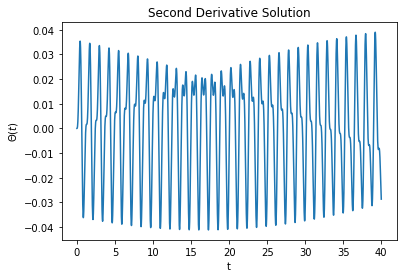

In [2]:
plot(X/w,Y[:,0])
title("Second Derivative Solution")
xlabel("t")
ylabel("$\Theta(t)$")
show()

This is the solution to the second derivative equation, showing how the angular displacement varies over time, you can see that the magnituede of this osscilation is changing as the forced oscillator changes its motion

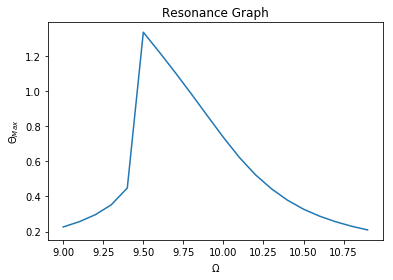

Peak Omega is : 9.5


In [3]:
plot(Irange,Ymax)
title("Resonance Graph")
xlabel("$\Omega$")
ylabel("$\Theta_{Max}$")
show()
print("Peak Omega is : " + str(amin(Irange) + Ymax.index(amax(Ymax))/10))

from this graph you can see that the maximum amplitude occurs at $\Omega = 9.5$ this must be where the oscillator it at maximum resonance

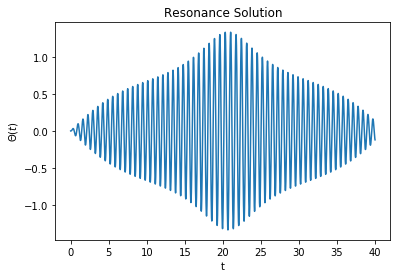

In [4]:
plot(X/w,_Y[:,0])
title("Resonance Solution")
xlabel("t")
ylabel("$\Theta(t)$")
show()

this is the solution to the equation with the predetermined resonance omega value, you can see that the amplitude of this oscillation is much greater than the initial function. This shows the effect of the forced resonance on the oscillator

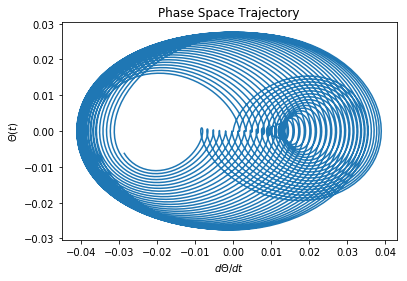

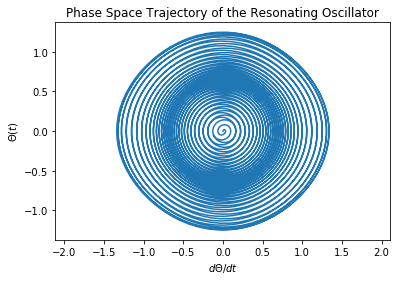

In [5]:
plot(Y[:,0],Y[:,1])
title("Phase Space Trajectory")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
show()

plot(_Y[:,0],_Y[:,1])
title("Phase Space Trajectory of the Resonating Oscillator")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
axis('equal')
show()

These are the phase-space trajectories of the forced oscillator and the resonating oscillator. They represent every situation of the oscillators over time, for some reference I've included the phase-state diagrams of some other oscillator examples:

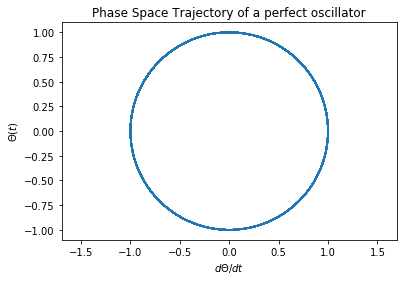

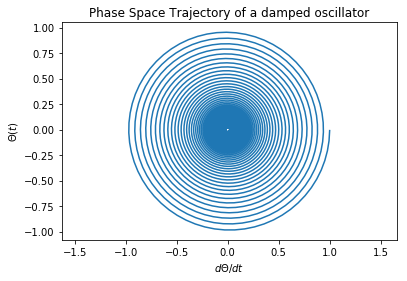

In [6]:
t = arange(0,400,0.1)
l = 0.0
plot(cos(t)*exp(-l*t),-(sin(t)+l*cos(t))*exp(-l*t))
title("Phase Space Trajectory of a perfect oscillator")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
axis('equal')
show()
l=0.01
plot(cos(t)*exp(-l*t),-(sin(t)+l*cos(t))*exp(-l*t))
title("Phase Space Trajectory of a damped oscillator")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
axis('equal')
show()

You can see from these graphs that the area within these graphs per cycle are analogous to the energies within the oscillator, from the perfect oscillator you see that no energy is transfered outside the system and the area is perfectly conserved in a circular area. The phase-space trajectory of the damped oscillator is a spiral starting from the outside, for every cycle the radius of the circle decreases which is representative of the energy lost to the outside of the oscillatory system through a damping coefficient.

the area inside the forced oscillation is realatively constant volume inside suggesting that the force doesn't affect the energy of the system that significantly (There's a discontinuity between cycles so the exact area is difficult to quantify perfectly)
however if you look at an individual cycle at different points in time you notice that the phase-space trajectory shape flips about the $\frac{d\theta}{dt}$ axis.

Looking at the inital $\theta (t)$ solution this is also accurately modeled by the phase-space trajectory graph since overall the amplitude of the oscillation is relatively constant but the positive amplitude decreases and the negative amplitude increases. at about 16s this switches direction and the oscillation maintains it's peak to peak amplitude but starts migrating back up. this is modelled in the phase-space diagram as a flip in the $\frac{d\theta}{dt}$ axis.

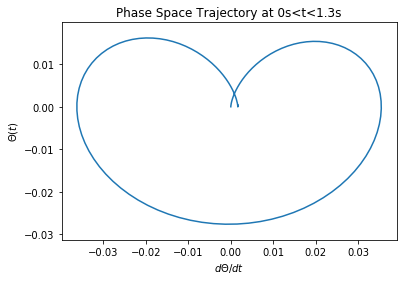

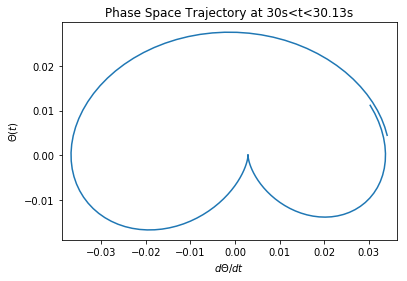

In [7]:
plot(Y[:130,0],Y[:130,1])
title("Phase Space Trajectory at 0s<t<1.3s")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
axis('equal')
show()
plot(Y[3000:3130,0],Y[3000:3130,1])
title("Phase Space Trajectory at 30s<t<30.13s")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
axis('equal')
show()

The area inside the Resonating oscillator is not constant however. You can see here that there is a similarity between the resonating oscillator and the damped oscillator. The difference however is the flow of time:

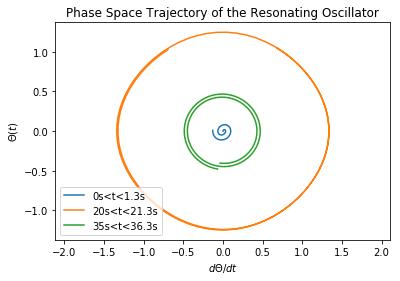

In [8]:
plot(_Y[:130,0],_Y[:130,1], label = "0s<t<1.3s")
title("Phase Space Trajectory of the Resonating Oscillator")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
axis('equal')
plot(_Y[2000:2130,0],_Y[2000:2130,1], label = "20s<t<21.3s")
title("Phase Space Trajectory of the Resonating Oscillator")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
axis('equal')
plot(_Y[3500:3630,0],_Y[3500:3630,1], label = "35s<t<36.3s")
title("Phase Space Trajectory of the Resonating Oscillator")
xlabel("$ {d\Theta}/{dt}$")
ylabel("$ \Theta(t) $")
axis('equal')
legend()
show()

as you can see the area contained by each cycle is changing, initially its spirals out rapidly increasing the area enclosed per cycle, then it reaches a peak amplitude and collapses back in on itself, spiralling back down to the zero position. This mirrors the amplitude shown on the resonance graph as it starts at 0, grows until the peak at ~20s where it then spirals back down to zero.